In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day35-complete-case-analysis\data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
training_hours            float64
target                    float64
dtype: object

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.05]

In [6]:
cols

['enrollee_id',
 'city',
 'city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [7]:
df[cols]

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,36.0,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15.0,47.0,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5.0,83.0,0.0
3,33241,city_115,0.789,No relevent experience,NaN,Graduate,0.0,52.0,1.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,20.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14.0,42.0,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14.0,52.0,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,44.0,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,0.0,97.0,0.0


In [16]:

    df[cols].columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience',
       'training_hours', 'target'],
      dtype='object')

In [22]:
len(df[cols].dropna()) / len(df[cols])

0.8968577095730244

In [23]:
new_df=df[cols].dropna()

array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'experience'}>,
        <AxesSubplot:title={'center':'training_hours'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

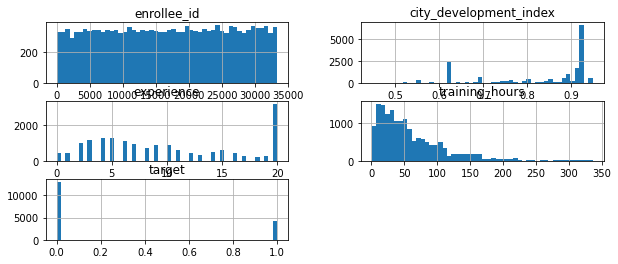

In [27]:
new_df.hist(bins=50,figsize=(10,4))

In [29]:
df[cols].select_dtypes(include=['float64','int64']).columns

Index(['enrollee_id', 'city_development_index', 'experience', 'training_hours',
       'target'],
      dtype='object')

In [31]:
num_col=['enrollee_id', 'city_development_index', 'experience', 'training_hours']

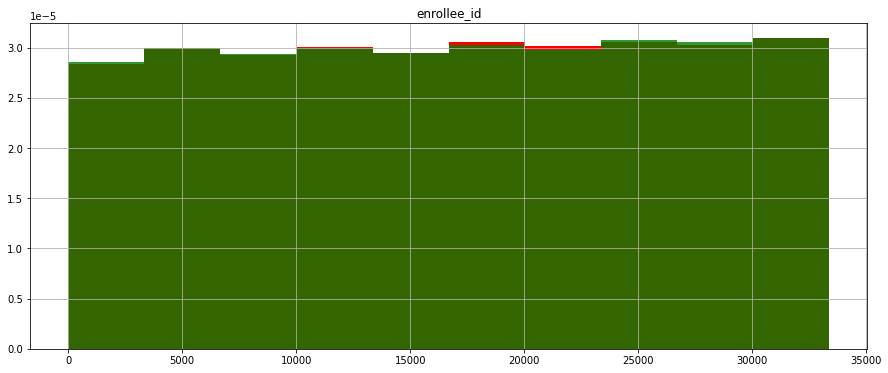

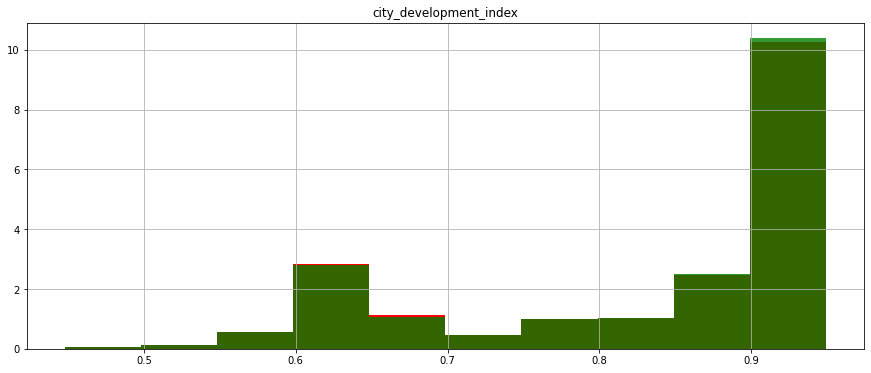

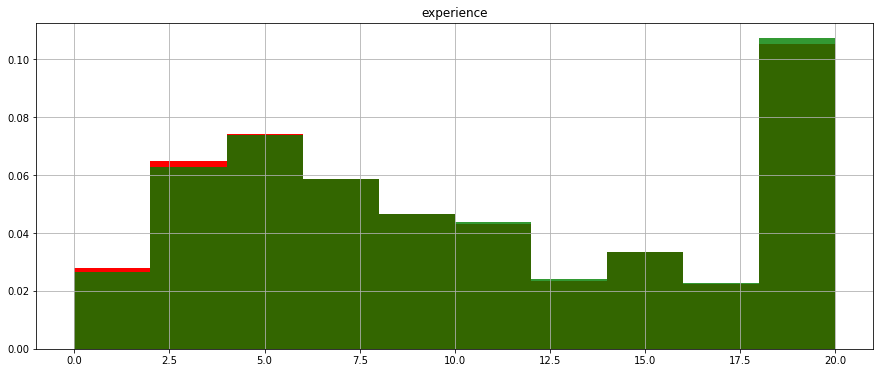

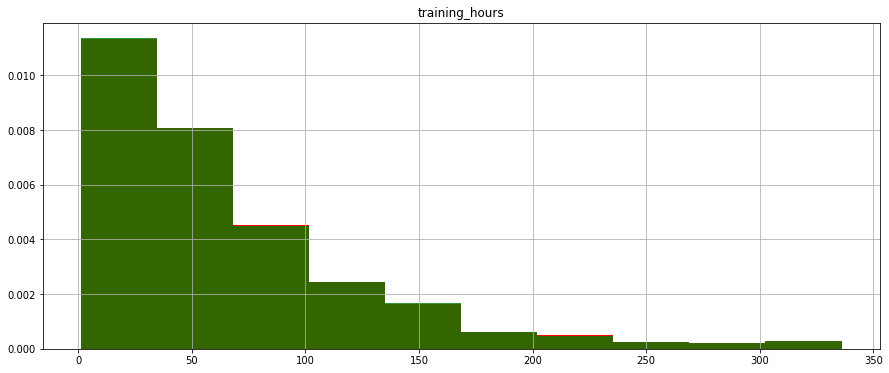

In [39]:
for i in num_col:
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(111)
    df[i].hist( ax=ax, density=True, color='red')
    new_df[i].hist( ax=ax, color='green', density=True, alpha=0.8)
    plt.title(i)

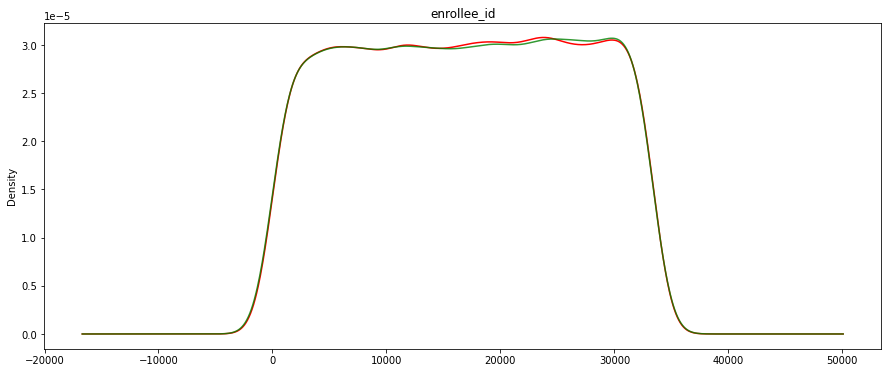

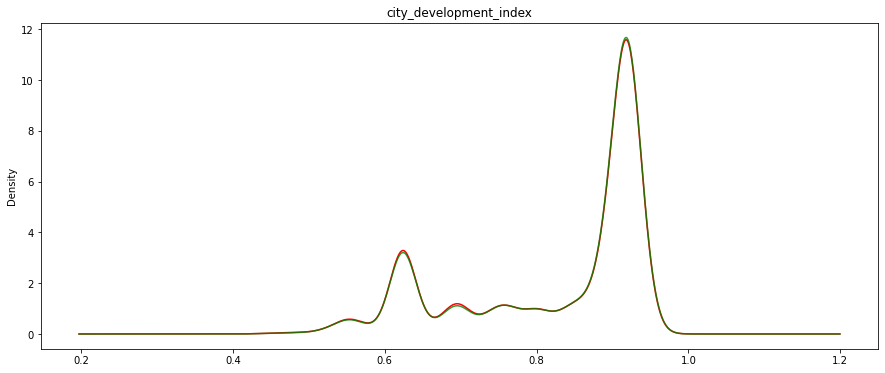

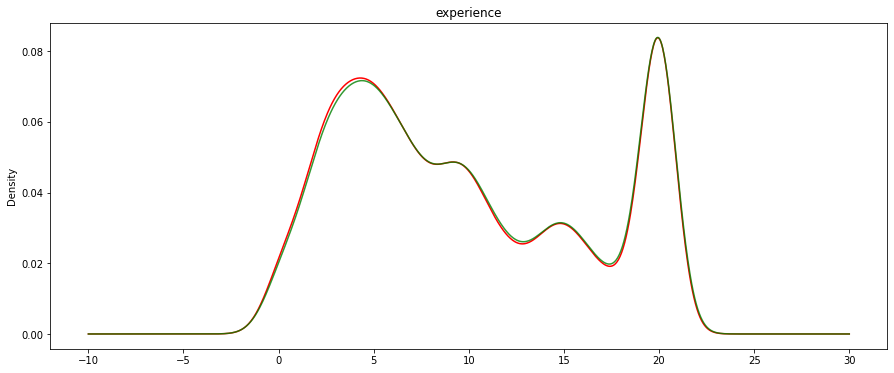

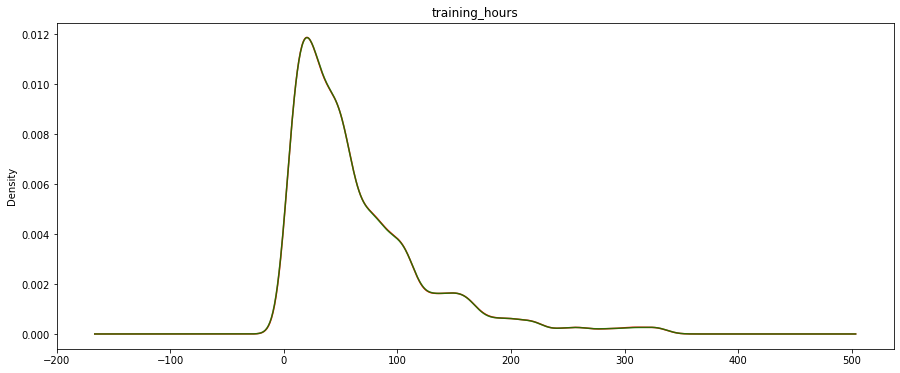

In [41]:
for i in num_col:
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(111)
    df[i].plot.density( ax=ax,  color='red')
    new_df[i].plot.density( ax=ax, color='green', alpha=0.8)
    plt.title(i)

In [43]:
df[cols].select_dtypes(include='object').columns

Index(['city', 'relevent_experience', 'enrolled_university',
       'education_level'],
      dtype='object')

In [44]:
cat_col=['city', 'relevent_experience', 'enrolled_university',
       'education_level']

In [51]:
for i in cat_col:
    print(pd.concat([
        df[i].value_counts()/len(df),
        df[i].value_counts()/len(new_df)],
        axis=1
    ))

              city      city
city_103  0.227320  0.253463
city_21   0.141038  0.157258
city_16   0.080019  0.089221
city_114  0.069736  0.077756
city_160  0.044107  0.049179
...            ...       ...
city_129  0.000157  0.000175
city_111  0.000157  0.000175
city_121  0.000157  0.000175
city_140  0.000052  0.000058
city_171  0.000052  0.000058

[123 rows x 2 columns]
                         relevent_experience  relevent_experience
Has relevent experience             0.719908             0.802701
No relevent experience              0.280092             0.312304
                  enrolled_university  enrolled_university
no_enrollment                0.721213             0.804156
Full time course             0.196106             0.218659
Part time course             0.062533             0.069724
                education_level  education_level
Graduate               0.605387         0.675009
Masters                0.227633         0.253812
High School            0.105282         0.11739